# WeatherPy


In [73]:
%matplotlib inline

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


#today's date to be used for time stamp in title of plots
todaysdate = time.strftime("%m/%d/%y")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [75]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
#cities_list = ["beckley","thompson","qaanaaq"] #used for testing the API info so it is only doing a few cities instead of 500+

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [106]:
#create dataframe to see the cities for reference
cities_info = pd.DataFrame(cities)

cities_info.head()

,0
0,anadyr
1,jumla
2,ushuaia
3,faanui
4,illoqqortoormiut


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()



print(weather_json)



{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 66.49, 'pressure': 1009.7, 'humidity': 91, 'temp_min': 66.49, 'temp_max': 66.49, 'sea_level': 1009.7, 'grnd_level': 945.64}, 'wind': {'speed': 1.07, 'deg': 253}, 'clouds': {'all': 0}, 'dt': 1554149318, 'sys': {'message': 0.0037, 'country': 'IN', 'sunrise': 1554166617, 'sunset': 1554210857}, 'id': 1273574, 'name': 'Vaini', 'cod': 200}


In [78]:
#print the json with better format
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 74.49,
        "lat": 15.34
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 66.49,
        "pressure": 1009.7,
        "humidity": 91,
        "temp_min": 66.49,
        "temp_max": 66.49,
        "sea_level": 1009.7,
        "grnd_level": 945.64
    },
    "wind": {
        "speed": 1.07,
        "deg": 253
    },
    "clouds": {
        "all": 0
    },
    "dt": 1554149318,
    "sys": {
        "message": 0.0037,
        "country": "IN",
        "sunrise": 1554166617,
        "sunset": 1554210857
    },
    "id": 1273574,
    "name": "Vaini",
    "cod": 200
}


In [79]:
#create lists to hold info for data frame that will be populated from the weather API info

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# set up counter to keep track of cities during the API pull
record_number = 0

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------------------")

#create a loop that will go through the the currently held cities in the cities list. append each list created above to hold the info
for city in cities:
    
    #create updated url with city name
    city_name_url = city
    city_url= url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city_name_url.replace(" ","+")
    
    try: #using the try/except function to skip any cities that are not available
    
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        name_of_city = response["name"] #used to populate the name of the city for the printed list
        name_of_country = response["sys"]["country"]
        
        # increase record counter by 1 for each loop
        record_number +=1
        
        print(f"Record Number {record_number} | {name_of_city} | {name_of_country} ")
        print(city_url)

                               
    except:
        print("City not found. Skipping to next city...") 
   

                               
# print message to say the pull is finished
print(f"-------------------------------------------")
print(f"Data Retrieval Finished")


Beginning Data Retrieval
-------------------------------------------
Record Number 1 | Anadyr | RU 
http://api.openweathermap.org/data/2.5/weather?appid=e6f5129fd2e851cacfbb601c3c8f267a&units=IMPERIAL&q=anadyr
Record Number 2 | Jumla | NP 
http://api.openweathermap.org/data/2.5/weather?appid=e6f5129fd2e851cacfbb601c3c8f267a&units=IMPERIAL&q=jumla
Record Number 3 | Ushuaia | AR 
http://api.openweathermap.org/data/2.5/weather?appid=e6f5129fd2e851cacfbb601c3c8f267a&units=IMPERIAL&q=ushuaia
Record Number 4 | Faanui | PF 
http://api.openweathermap.org/data/2.5/weather?appid=e6f5129fd2e851cacfbb601c3c8f267a&units=IMPERIAL&q=faanui
City not found. Skipping to next city...
Record Number 5 | Cape Town | ZA 
http://api.openweathermap.org/data/2.5/weather?appid=e6f5129fd2e851cacfbb601c3c8f267a&units=IMPERIAL&q=cape+town
City not found. Skipping to next city...
Record Number 6 | Bandar | ID 
http://api.openweathermap.org/data/2.5/weather?appid=e6f5129fd2e851cacfbb601c3c8f267a&units=IMPERIAL&q=band

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
#create data frame from the lists

weather_dictionary = {
    "City":city_name,
    "Country":country,
    "Cloudiness":cloudiness,
    "Date":date,
    "Humidity": humidity,
    "Latitude":lat,
    "Longitude":lng,
    "Max Temperature":max_temp,
    "Wind Speed": wind_speed    
}

weather_data = pd.DataFrame(weather_dictionary)

#display count of each column for referece
weather_data.count()

City               560
Country            560
Cloudiness         560
Date               560
Humidity           560
Latitude           560
Longitude          560
Max Temperature    560
Wind Speed         560
dtype: int64

In [108]:
#display data frame
weather_data.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Anadyr,RU,40,1554149563,92,64.73,177.51,30.00,26.84
1,Jumla,NP,0,1554149875,95,29.28,82.18,22.75,1.70
2,Ushuaia,AR,75,1554145200,87,-54.81,-68.31,53.60,5.28
3,Faanui,PF,68,1554149409,100,-16.48,-151.75,82.78,6.33
4,Cape Town,ZA,0,1554148991,62,-33.93,18.42,60.01,17.22


In [109]:
#export data frame to csv


export_csv = weather_data.to_csv("../weather_data_cities.csv", index =False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

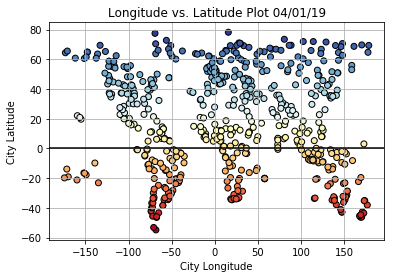

In [105]:
#this scatter plot shows where the cities are located in the world to ensure that there is a good representation from the random list of cities. 
#it also shows a variance in color of the markers using diverging color map

plt.scatter(weather_data["Longitude"], weather_data["Latitude"], c=weather_data["Latitude"], marker = "o", edgecolor="black",cmap='RdYlBu')

plt.title(f"Longitude vs. Latitude Plot {todaysdate}")
plt.xlabel("City Longitude")
plt.ylabel("City Latitude")
plt.axhline(0, color = 'black', alpha = 1)
plt.grid(True)


#save the figure 
plt.savefig("../Images/LongitudevsLatitude.png",bbox_inches="tight") 

plt.show()

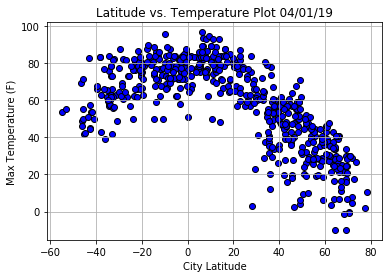

In [95]:
#build scatter plot

plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker = "o", facecolors="blue", edgecolor="black")
 
plt.title(f"Latitude vs. Temperature Plot {todaysdate}")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#save the figure 
plt.savefig("../Images/LatvsTemp.png",bbox_inches="tight") 

plt.show()

#### Latitude vs. Humidity Plot

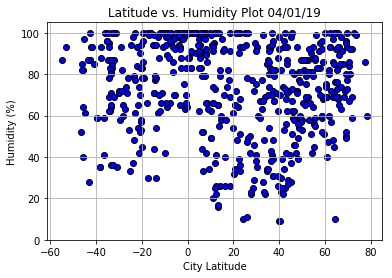

In [101]:
#build scatter plot

plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker = "o", facecolors="blue", edgecolor="black")

plt.title(f"Latitude vs. Humidity Plot {todaysdate}")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.ylim(0,105)

#save the figure 
plt.savefig("../Images/LatvsHumidity.png",bbox_inches="tight") 

plt.show()

#### Latitude vs. Cloudiness Plot

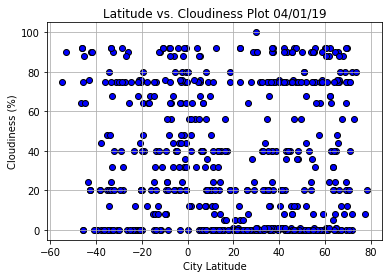

In [97]:
#build scatter plot

plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker = "o", facecolors="blue", edgecolor="black")

plt.title(f"Latitude vs. Cloudiness Plot {todaysdate}")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#save the figure 
plt.savefig("../Images/LatvsCloudiness.png",bbox_inches="tight") 

plt.show()

#### Latitude vs. Wind Speed Plot

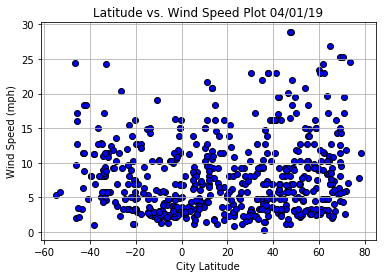

In [98]:
#build scatter plot

plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker = "o", facecolors="blue", edgecolor="black")

plt.title(f"Latitude vs. Wind Speed Plot {todaysdate}")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#save the figure 
plt.savefig("../Images/LatvsWindSpeed.png",bbox_inches="tight") 

plt.show()